<a href="https://colab.research.google.com/github/zcalhoun/data-plus-22/blob/Rebecca/Sampling_from_Cities_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv

Grab csv with lat/lon of cities

In [ ]:
worldcities = pd.read_csv('/content/worldcities.csv', nrows = 10000)
worldcities

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
9995,Danilovgrad,Danilovgrad,42.6100,19.0500,Montenegro,ME,MNE,Danilovgrad,admin,42132,1499538261
9996,Ar Rustāq,Ar Rustaq,23.3908,57.4244,Oman,OM,OMN,Janūb al Bāţinah,admin,42120,1512376854
9997,Amuru,Amuru,2.8139,31.9387,Uganda,UG,UGA,Amuru,admin,42112,1800642608
9998,Samamea,Samamea,-13.9338,-171.5312,Samoa,WS,WSM,Va‘a-o-Fonoti,admin,42102,1882468874


In [ ]:
from csv import reader
worldcities = worldcities[['lat', 'lng', 'population']]
worldicites = worldcities.rename(columns={'lng': 'lon'}, inplace=True)
worldicites = worldcities.rename(columns={'population': 'pop'}, inplace=True)
worldcities.to_csv('worldcities_lat_lon_pop.csv', index=False)

# i = 0
# nworldcities = open(f'nworldcities.csv', 'w', newline='')
# writer = csv.writer(nworldcities)
# header = ['lat', 'lon', 'pop']
# writer.writerow(header)

# with open('/content/worldcities_lat_lon_pop.csv', 'r') as worldcities_llp:

#   csv_reader = reader(worldcities_llp)
#   header = next(csv_reader)
#   for row in csv_reader:
#     if row[2]=='' or float(row[2]) <= 1000:
#       continue
#     else:
#       writer.writerow(row)
#       i += 1
#     if i == 10000:
#       nworldcities.close()
#       break  



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
import math
cities = pd.read_csv('/content/worldcities_lat_lon_pop.csv')
population = cities[['pop']]
b=population.iloc[:,:].values
print (b)
sum = 0
for item in b:
  sum += math.log(item[0])
print (sum)

[[39105000]
 [35362000]
 [31870000]
 ...
 [   42112]
 [   42102]
 [   42100]]
118362.5705976256


In [ ]:
!pip install geopandas
import geopandas as gpd
import shapely.geometry
from shapely.geometry import Point

# geodata = gpd.read_file('/content/World_Continents.shp')
# no_antarctica = geodata.drop(6)
# print (geodata)
# print (geodata.type)
# def check_in_land(lat,lon):
polygons = gpd.GeoSeries.from_file('/content/World_Continents.shp')
print (polygons)
polygons = polygons.drop(6)
polygons = polygons.unary_union
  # print (polygons)
  # point = Point(lat,lon)
  # if polygons.contains(point):
  #   return False
  # return True
  # return polygons.contains(point)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.0 MB/s 
     |████████████████████████████████| 6.3 MB 38.5 MB/s 
     |████████████████████████████████| 16.7 MB 315 kB/s 
0    MULTIPOLYGON (((35.48832 -21.68500, 35.45222 -...
1    MULTIPOLYGON (((-179.99999 68.98009, -179.9580...
2    MULTIPOLYGON (((158.88218 -54.71139, 158.87967...
3    MULTIPOLYGON (((-81.67847 7.38861, -81.64945 7...
4    MULTIPOLYGON (((179.99999 -16.96574, 179.98468...
5    MULTIPOLYGON (((-67.20889 -55.89104, -67.24695...
6    MULTIPOLYGON (((-179.99999 -84.30535, -179.931...
7    MULTIPOLYGON (((23.84853 35.52298, 23.97138 35...
Name: geometry, dtype: geometry


In [ ]:
# from scipy.stats.stats import F_onewayBadInputSizesWarning
# from sys import last_traceback
# #https://stackoverflow.com/questions/42339786/how-to-plot-the-pdf-of-a-1d-gaussian-mixture-model-with-matplotlib/42342639#42342639
# #https://stackoverflow.com/questions/47759577/creating-a-mixture-of-probability-distributions-for-sampling

import scipy
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from tqdm import tqdm
import csv
import random
import numpy as np
from numpy.random import choice

worldcities = pd.read_csv('/content/worldcities_lat_lon_pop.csv')

# Ellipsoid model constants (actual values here are for WGS84) 
sm_a = 6378137.0 
sm_b = 6356752.314

distributions = []
earth_radius = 6371000
distance = math.degrees(0.5 * ((50000) / earth_radius))
cov = np.array([[distance, 0],
               [0, distance]])
# coords_file = open(f'coordinates_generated.csv', 'w', newline='')
# writer = csv.writer(coords_file)
# header = ['lat', 'lon']
# writer.writerow(header)
# lst_coords = np.array([])
lst_coords = []
size = 13500000
fsize = 10000000


for i in range(len(worldcities)):
  mean = np.array(worldcities.iloc[i][0:2])
  cov = np.array([[distance ** 2, 0],
               [0, (distance/math.cos(math.radians(mean[0])))**2]])
  pop = worldcities.iloc[i][2]
  n = math.log(pop) * (size/sum)
  for j in range (int (n)):
    coords = np.random.default_rng().multivariate_normal(mean, cov)
    # print (coords)
    # lst_coords = np.append(lst_coords,[coords])
    lat = coords[0]
    coords[0] = coords[1]
    coords[1] = lat
    # print (coords)
    lst_coords.append(coords.tolist())



points = shapely.geometry.MultiPoint(lst_coords)
print (points)
points = points.intersection(polygons)
print (points)
samples = np.array(points)
print (len(samples))
header = np.array([['lon', 'lat']])
a = samples[np.random.choice(len(samples), fsize)]

file = np.vstack([header, a])
pd.DataFrame(file).to_csv(
        f'coordinates_generated_{fsize}.csv', header=None, index=None)


    # if check_in_land(coords[0], coords[1]):
    #   writer.writerow(coords)
# print (lst_coords)
# coords_file.close()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


11702424


In [ ]:
# print (lst_coords)
# print (points.type)
# samples = np.random.uniform(
#         (1, 0), (2, 2), (int(100.2), 2))
# print (samples)
# multipoint = shapely.geometry.MultiPoint(samples)
# print (multipoint)
print (len(samples))

11702424


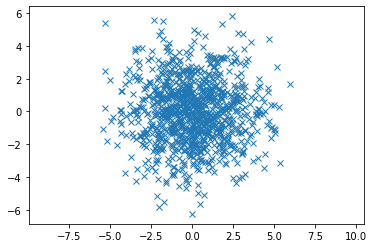

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean = [0,0]
cov = [[4,0],[0,4]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()